# 手游玩家付费预测EDA
**目的：**利用制表、作图、特征分析等方法，对手游玩家的付费数据进行探索性数据分析，找出不同玩家之间的特点和规律，为接下来的预测模型提供思路和方法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif']=['simHei']
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 读取数据
data = pd.read_table('E:\数据分析学习资料汇总/手游玩家付费金额预测/tap4fun游戏玩家付费金额预测大赛/tap4fun竞赛数据/tap_fun_train.csv',\
              sep=',')

In [4]:
data.shape

(2288007, 110)

## 观察和理解特征

In [11]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


### 字段解析
- user_id : 玩家id
- register_time：玩家注册时间
- 各种游戏资源获取和消耗数量（木头、石头、象牙、肉、魔法）
- 各兵种招募与损失，伤兵产生和恢复数量（勇士、驯兽师、萨满）
- 各种加速券的获取和使用数量（通用、建筑、科研、训练、治疗）
- 各类建筑等级（兵营、神庙、仓库等16类建筑）
- 各类科研等级（兵种的，资源生产的、战斗辅助的共49种）
- PVP和PVE次数（总次数、发起次数、胜利次数）
- avg_online_minutes：在线时长
- pay_price：前7日付费金额
- pay_count：前7日付费次数
- prediction_pay_price：前45日付费金额

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


## 数据类型的观察（int/float/str）与转换（时间类型）

In [19]:
# 各类数据类型占比
data.dtypes.value_counts()

int64      95
float64    13
object      1
dtype: int64

In [20]:
# 数据类型为object的字段有
data.select_dtypes(include='object').head()

,register_time
0,2018-02-02 19:47:15
1,2018-01-26 00:01:05
2,2018-01-26 00:01:58
3,2018-01-26 00:02:13
4,2018-01-26 00:02:46


In [5]:
# 对register_time字段去除时分秒，并转化为时间字段
data.register_time = pd.to_datetime(data.register_time).dt.normalize()

In [6]:
# user_id转为类别字段
data.user_id = data.user_id.astype('object')

## 缺失值检测与填充/删除

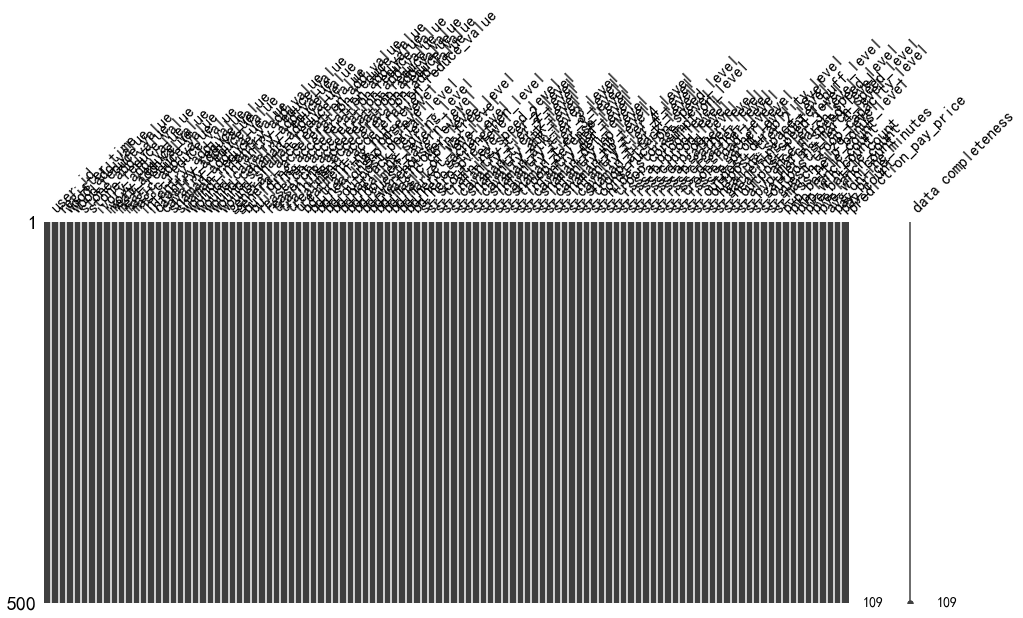

In [27]:
# 用missingno实现缺失值可视化
import missingno as msno
msno.matrix(data.sample(500),
           figsize=(16,7),
           width_ratios=(15,1),
           labels=True)

In [28]:
# 检测数据是否有缺失值 => 无缺失值
data.isnull().sum().value_counts()

True    109
dtype: int64

## 抽样查看各类型字段分布情况

In [7]:
data.describe()

,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,...,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price,weather_pay
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,4.725399e+04,...,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.020749e+01,5.346691e-01,5.770699e-02,1.793146e+00,1.811140e-02
std,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,9.662892e+05,8.811223e+05,...,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.895946e+01,2.263835e+01,7.090886e-01,8.846303e+01,1.333543e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,2.637229e+08,...,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04,1.000000e+00


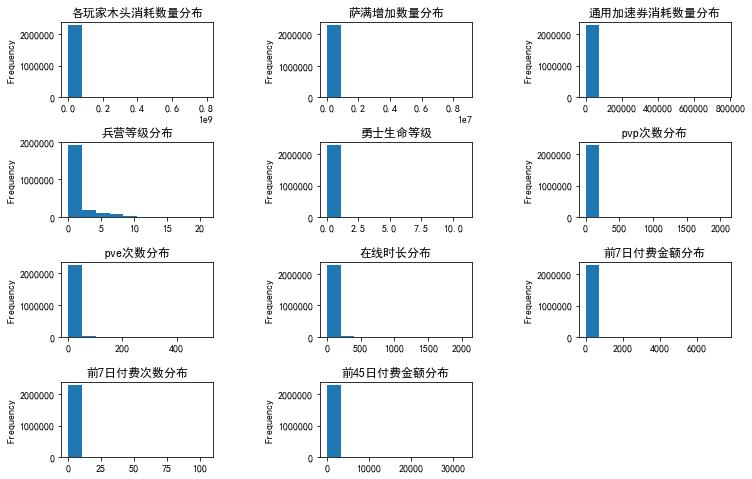

In [56]:
plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace = 0.7 , hspace = 0.6)#调整子图间距
plt.subplot(431)
# 游戏资源类数据中，各玩家木头消耗数量分布
plt.title('各玩家木头消耗数量分布')
data.wood_reduce_value.plot.hist()

plt.subplot(432)
# 兵种类数据中，各玩家萨满增加数量分布
plt.title('萨满增加数量分布')
data.shaman_add_value.plot.hist()

plt.subplot(433)
# 加速券类数据中，通用加速券消耗数量分布
plt.title('通用加速券消耗数量分布')
data.general_acceleration_reduce_value.plot.hist()

plt.subplot(434)
# 建筑等级类数据中，兵营等级分布
plt.title('兵营等级分布')
data.bd_barrack_level.plot.hist()

plt.subplot(435)
# 科研等级类数据中，勇士生命等级分布
plt.title('勇士生命等级')
data.sr_infantry_hp_level.plot.hist()

plt.subplot(436)
# pvp次数分布
plt.title('pvp次数分布')
data.pvp_battle_count.plot.hist()

plt.subplot(437)
# pve次数分布
plt.title('pve次数分布')
data.pve_battle_count.plot.hist()

plt.subplot(438)
# 在线时长分布
plt.title('在线时长分布')
data.avg_online_minutes.plot.hist()

plt.subplot(439)
# 前7日付费金额分布
plt.title('前7日付费金额分布')
data.pay_price.plot.hist()

plt.subplot(4,3,10)
# 前7日付费次数分布
plt.title('前7日付费次数分布')
data.pay_count.plot.hist()

plt.subplot(4,3,11)
# 前45日付费金额分布
plt.title('前45日付费金额分布')
data.prediction_pay_price.plot.hist()
plt.show()


- 整体数据右偏，说明大部分玩家只玩了很短的时间，同时受极大值影响大

## 从时间维度分析

In [156]:
min_date = data.register_time.min().strftime('%Y-%m-%d')
max_date = data.register_time.max().strftime('%Y-%m-%d')
diff_date = int((data.register_time.max()-data.register_time.min())/ np.timedelta64(1, 'D'))
print('统计的玩家范围为注册时间从{}到{}'.format(min_date, max_date))
print('共统计了{}天的数据'.format(diff_date))

统计的玩家范围为注册时间从2018-01-26到2018-03-06
共统计了39天的数据


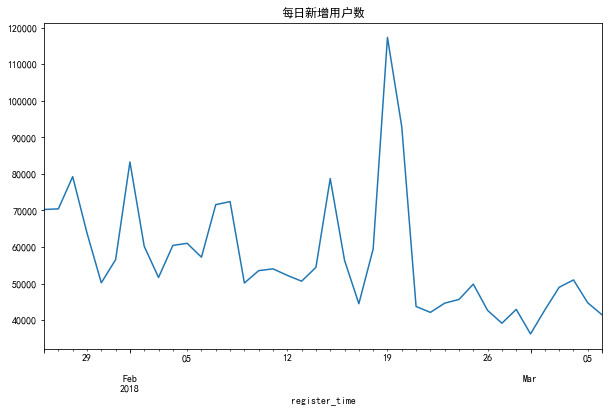

平均每日注册用户数： 57200.175
每日最多注册用户数： 117311
每日最少注册用户数： 36226


In [78]:
# 每日新增用户数,总体下降，2月19号前后有一波大高潮
plt.figure(figsize=(10,6))
plt.title('每日新增用户数')
data.groupby('register_time').user_id.count().plot()
plt.show()
mean_user = data.groupby('register_time').count().user_id.mean()
max_user = data.groupby('register_time').count().user_id.max()
min_user = data.groupby('register_time').count().user_id.min()
print('平均每日注册用户数：', mean_user)
print('每日最多注册用户数：', max_user)
print('每日最少注册用户数：', min_user)

- 每日新增用户数总体呈下降趋势
- 平均每日注册用户数有5.7万人，2月19号达11.7万人，是平时的两倍，可能与营销推广活动有关，最低是3月1号，只有3.6万人

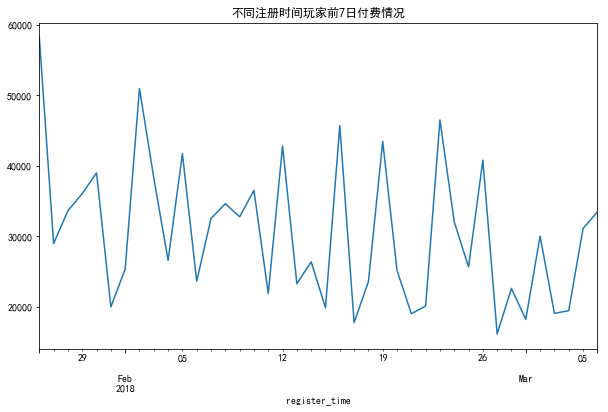

In [110]:
# 不同注册时间玩家前7日付费情况
plt.figure(figsize=(10,6))
plt.title('不同注册时间玩家前7日付费情况')
data.groupby('register_time').sum().pay_price.plot()
plt.show()

- 注册玩家增多的日期并不能带来充值金额的增大，可见营销推广获取的玩家质量不高，应考虑渠道存在作弊情况

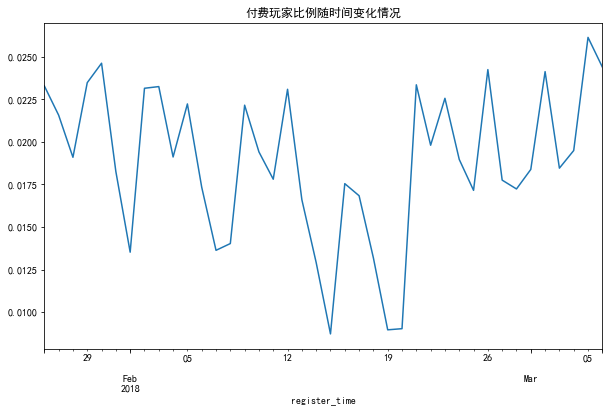

In [8]:
# 付费玩家比例随时间变化情况
data['weather_pay'] = data.pay_price.apply(lambda x : 1 if x>0 else 0)
plt.figure(figsize=(10,6))
plt.title('付费玩家比例随时间变化情况')
data.groupby('register_time').apply(lambda x : x.weather_pay.sum() / x.weather_pay.count()).plot()
plt.show()

- 上图也说明了注册玩家的增多并不能带来充值金额的增加，新增的玩家基本不付费

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

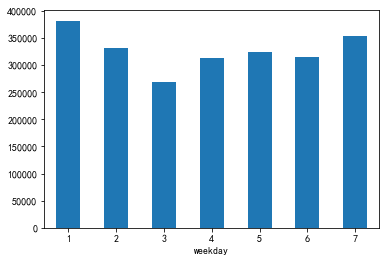

In [157]:
data['weekday'] = data.register_time.dt.weekday+1
data.groupby('weekday').user_id.count().plot.bar()
plt.xticks(rotation=0)

- 不同星期新增玩家数对比图显示，周一与周日新增玩家数比较多，周三最少

In [75]:
# 所有用户日平均在线时长，和周平均在线时长
print('所有用户日平均在线时长(min):', data.avg_online_minutes.sum()/data.user_id.count())
print('所有用户周平均在线时长(min):', data.avg_online_minutes.sum()*7/data.user_id.count())

所有用户日平均在线时长(min): 10.207489627811018
所有用户周平均在线时长(min): 71.45242739467713


In [76]:
# 付费用户日平均在线时长 与 不付费用户日平均在线时长
print('付费用户日平均在线时长(min):', data[data.pay_price>0].avg_online_minutes.sum()/data[data.pay_price>0].user_id.count())
print('不付费用户日平均在线时长(min):', data[data.pay_price==0].avg_online_minutes.sum()/data[data.pay_price==0].user_id.count())

付费用户日平均在线时长(min): 140.18774584526656
不付费用户日平均在线时长(min): 7.8099428643054685


count    2.288007e+06
mean     1.020749e+01
std      3.895946e+01
min      0.000000e+00
25%      5.000000e-01
50%      1.833333e+00
75%      4.833333e+00
max      2.049667e+03
Name: avg_online_minutes, dtype: float64


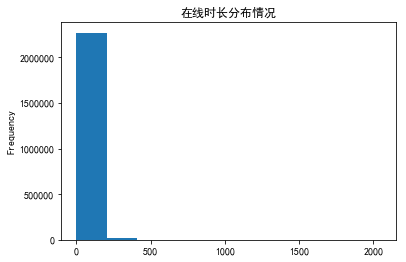

In [155]:
# 在线时长分布情况
print(data.avg_online_minutes.describe())
plt.title('在线时长分布情况')
data.avg_online_minutes.plot.hist()
plt.show()

- 75%玩家在线时长在5分钟内，说明也就下载试玩了不到5分钟，后面不再玩过

## 从玩家个体维度分析

In [86]:
lt = []
lt.append(data[data.pay_count==0].pay_count.count())
lt.append(data[data.pay_count>0].pay_count.count())
lt.append(data[data.pay_count==1].pay_count.count())
lt.append(data[data.pay_count>1].pay_count.count())
df = pd.DataFrame(lt, index=['没付费', '付费', '只付费1次', '付费多次'])

付费率 0.018111395638212645


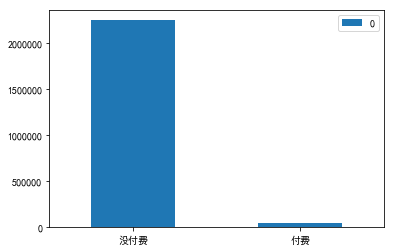

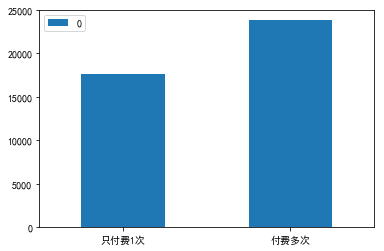

In [105]:
# 大部分是不付费用户
# 在付费用户中，多次付费的用户高于只付费一次的用户，因此要提高付费率
df.iloc[0:2].plot.bar()
plt.xticks(rotation=0)
df.iloc[2:].plot.bar()
plt.xticks(rotation=0)
# 付费率
print('付费率',data[data.pay_count>0].user_id.count() / data.user_id.count())


 - 大部分为不付费玩家，付费率只有1.8%
 - 但是在付费玩家中，付费多次的高于只付费1次的，说明充值过的玩家往往容易再次充值

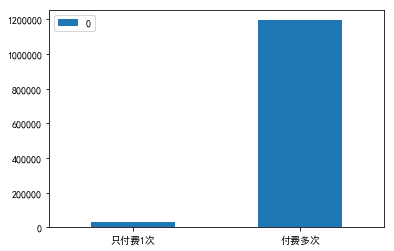

In [107]:
df1 = pd.DataFrame([data[data.pay_count==1].pay_price.sum(), data[data.pay_count>1].pay_price.sum()],\
                  index=['只付费1次', '付费多次'])
df1.plot.bar()
plt.xticks(rotation=0)
plt.show()

- 付费多次玩家充值金额也远高于付费1次玩家

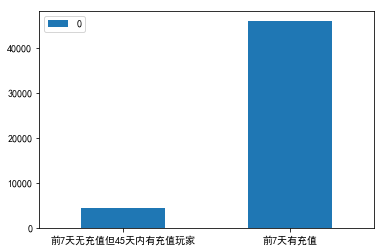

在前45天有充值玩家中，前7天无充值玩家数量占比为： 0.09891710881099418


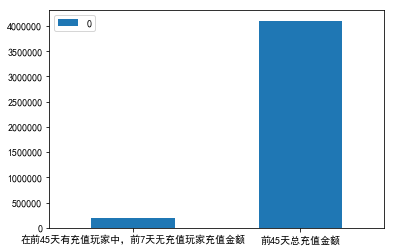

在前45天有充值玩家中，前7天无充值玩家充值金额占比为： 0.04528545505519495


In [145]:
# 在前45天有充值玩家中，前7天无充值玩家占比情况
nopay_price_7 = data[(data.prediction_pay_price>0) & (data.pay_price == 0)]
nopay_price_7_count = nopay_price_7.user_id.count()
nopay_price_7_money = nopay_price_7.prediction_pay_price.sum()

pay_price_7 = data[data.prediction_pay_price>0]
pay_price_7_count = pay_price_7.user_id.count()
pay_price_7_money = pay_price_7.prediction_pay_price.sum()

df3 = pd.DataFrame([nopay_price_7_count, pay_price_7_count], \
                   index=['前7天无充值但45天内有充值玩家', '前7天有充值'])
df3.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('在前45天有充值玩家中，前7天无充值玩家数量占比为：', nopay_price_7_count/pay_price_7_count )

df4 = pd.DataFrame([nopay_price_7_money, pay_price_7_money], \
                   index=['在前45天有充值玩家中，前7天无充值玩家充值金额', '前45天总充值金额'])
df4.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('在前45天有充值玩家中，前7天无充值玩家充值金额占比为：', nopay_price_7_money/pay_price_7_money)

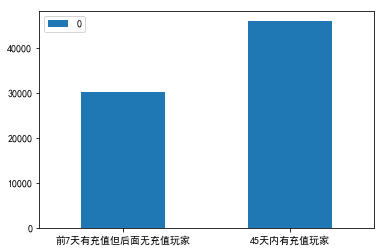

前7天有充值但后面无充值玩家与45天内有充值玩家数量占比为： 0.6551709141515177


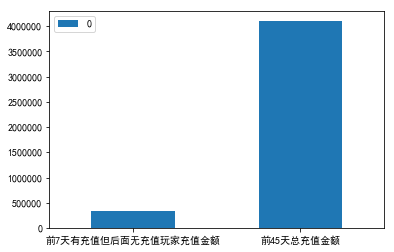

前7天有充值但后面无充值玩家充值金额与前45天总充值金额占比为： 0.0837747453000266


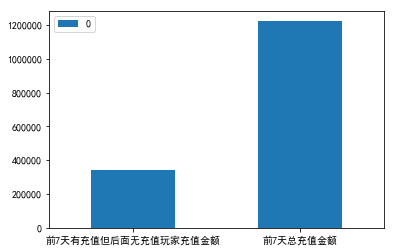

前7天有充值但后面无充值玩家充值金额与前7天总充值金额占比为： 0.2809594372773662


In [159]:
# 在前45天有充值玩家中，前7天有充值后面无充值的玩家占比情况
nopay_price_45 = data[(data.prediction_pay_price>0) & (data.pay_price == data.prediction_pay_price)]
nopay_price_45_count = nopay_price_45.user_id.count()
nopay_price_45_money = nopay_price_45.prediction_pay_price.sum()

pay_price_45 = data[data.prediction_pay_price>0]
pay_price_45_count = pay_price_45.user_id.count()
pay_price_45_money = pay_price_45.prediction_pay_price.sum()
df5 = pd.DataFrame([nopay_price_45_count, pay_price_45_count], \
                   index=['前7天有充值但后面无充值玩家', '45天内有充值玩家'])
df5.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值但后面无充值玩家与45天内有充值玩家数量占比为：', nopay_price_45_count/pay_price_45_count )

df6 = pd.DataFrame([nopay_price_45_money, pay_price_45_money], \
                   index=['前7天有充值但后面无充值玩家充值金额', '前45天总充值金额'])
df6.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值但后面无充值玩家充值金额与前45天总充值金额占比为：',\
                                                    nopay_price_45_money/pay_price_45_money)

df7 = pd.DataFrame([nopay_price_45_money, data.pay_price.sum()], \
                   index=['前7天有充值但后面无充值玩家充值金额', '前7天总充值金额'])
df7.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值但后面无充值玩家充值金额与前7天总充值金额占比为：',\
                                                    nopay_price_45_money/data.pay_price.sum())


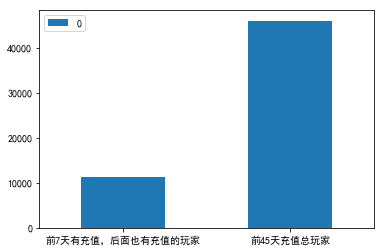

前7天有充值，后面也有充值的玩家与前45天充值总玩家数量占比为： 0.24591197703748804


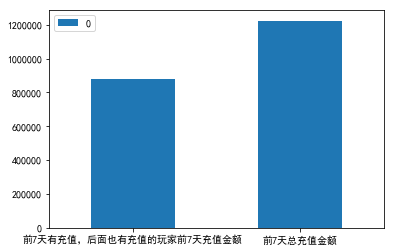

前7天有充值，后面也有充值玩家前7天充值金额与前7天总充值金额占比为： 0.7190405627226338


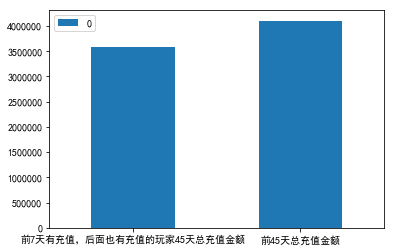

前7天有充值，后面也有充值的玩家45天总充值金额与前45天总充值金额占比为： 0.8709397996447785


In [158]:
# 前7天有充值，后面也有充值的玩家与前45天充值总玩家占比情况
pay_all_45 = data[(data.pay_price>0) & (data.prediction_pay_price > data.pay_price)]
pay_all_45_count = pay_all_45.user_id.count()
pay_all_45_money_7 = pay_all_45.pay_price.sum()
pay_all_45_money_45 = pay_all_45.prediction_pay_price.sum()

pay_45 = data[data.prediction_pay_price>0]
pay_45_count = pay_45.user_id.count()
pay_45_money_7 = pay_45.pay_price.sum()
pay_45_money_45 = pay_45.prediction_pay_price.sum()

df8 = pd.DataFrame([pay_all_45_count, pay_45_count], \
                   index=['前7天有充值，后面也有充值的玩家', '前45天充值总玩家'])
df8.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值，后面也有充值的玩家与前45天充值总玩家数量占比为：', pay_all_45_count/pay_45_count )

df9 = pd.DataFrame([pay_all_45_money_7, pay_45_money_7], \
                   index=['前7天有充值，后面也有充值的玩家前7天充值金额', '前7天总充值金额'])
df9.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值，后面也有充值玩家前7天充值金额与前7天总充值金额占比为：',\
                                                    pay_all_45_money_7/pay_45_money_7)


df10 = pd.DataFrame([pay_all_45_money_45, pay_45_money_45], \
                   index=['前7天有充值，后面也有充值的玩家45天总充值金额', '前45天总充值金额'])
df10.plot.bar()
plt.xticks(rotation=0)
plt.show()
print('前7天有充值，后面也有充值的玩家45天总充值金额与前45天总充值金额占比为：',\
                                                    pay_all_45_money_45/pay_45_money_45)





In [74]:
# ARPU ARPPU
print('ARPU =', data.pay_price.sum() / data.user_id.count())
print('ARPPU =', data.pay_price.sum() / data[data.pay_price>0].user_id.count())

ARPU = 0.5346691072186407
ARPPU = 29.52114336735926


## 象限法给玩家分类
- 前7天有充值，前45天有充值：核心玩家
- 前7天无充值，前45天有充值：重点培养玩家
- 前7天有充值，前45天无充值：重点挽留玩家
- 前7天无充值，前45天无充值：普通玩家

In [149]:
data['user_label'] = 'a'
data['user_label'][(data.pay_price>0)& (data.prediction_pay_price>data.pay_price)] = '核心玩家'
data['user_label'][(data.pay_price==0)& (data.prediction_pay_price>data.pay_price)] = '重点培养玩家'
data['user_label'][(data.pay_price>0)& (data.prediction_pay_price==data.pay_price)] = '重点挽留玩家'
data['user_label'][(data.pay_price==0)& (data.prediction_pay_price==data.pay_price)] = '普通玩家'

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

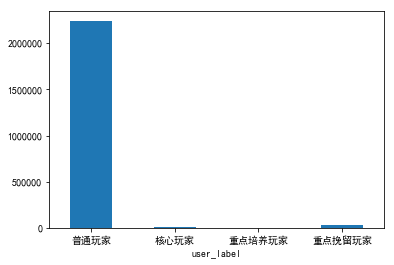

In [151]:
# 各类型用户占比
data.groupby('user_label').user_id.count().plot.bar()
plt.xticks(rotation=0)